In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#载入数据
x, y = load_digits(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=202406)  #划分训练集与测试集

#进行标准化操作
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
#使用训练数据的参数进行标准化
x_test_scaled = scaler.transform(x_test)
print(x_train_scaled.shape, x_test_scaled.shape, y_train.shape, y_test.shape)


(1437, 64) (360, 64) (1437,) (360,)


In [3]:
from sklearn.svm import SVC

#构建和训练模型
classifier = SVC(kernel='linear', random_state=202406)
classifier.fit(x_train_scaled, y_train)


SVC(kernel='linear', random_state=202406)

In [7]:
from sklearn.metrics import classification_report, confusion_matrix

#进行模型评估
y_pred = classifier.predict(x_test_scaled)
acc = classifier.score(x_test_scaled, y_test)
print(f"准确率:{acc * 100:.2f}%")
print("-----分类报告如下-----")
print(classification_report(y_test, y_pred))
print("混淆矩阵如下")
cm = confusion_matrix(y_test, y_pred)
print(cm)

准确率:98.06%
-----分类报告如下-----
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       0.94      1.00      0.97        33
           2       0.98      1.00      0.99        42
           3       0.97      0.97      0.97        35
           4       1.00      1.00      1.00        35
           5       0.97      0.97      0.97        38
           6       1.00      0.97      0.99        36
           7       0.97      0.97      0.97        40
           8       0.97      0.95      0.96        38
           9       1.00      0.97      0.98        33

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

混淆矩阵如下
[[30  0  0  0  0  0  0  0  0  0]
 [ 0 33  0  0  0  0  0  0  0  0]
 [ 0  0 42  0  0  0  0  0  0  0]
 [ 0  0  1 34  0  0  0  0  0  0]
 [ 0  0  0  0 35  0  0  0  0  0]
 [ 0  0  0  0  0 37  0  1  0  0]
 [ 0  1 

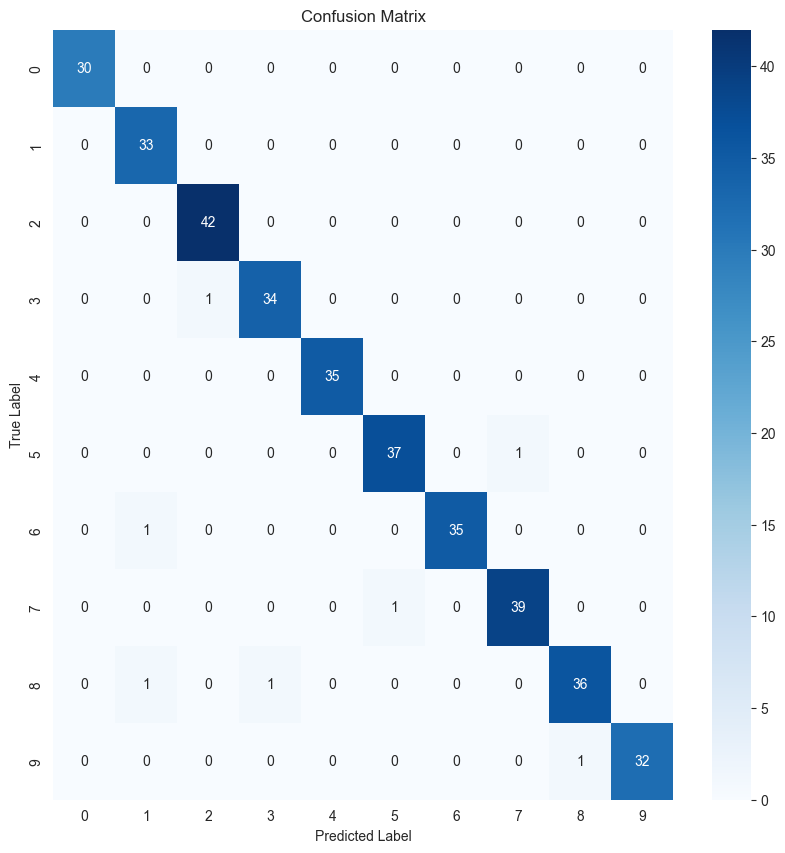

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 绘制混淆矩阵的热力图
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

[ 0.  0.  3. 15. 16. 16.  5.  0.  0.  0. 10. 12. 10. 16.  6.  0.  0.  2.
 15.  2.  3. 16.  1.  0.  0.  0.  2.  3. 10. 13.  2.  0.  0.  0.  3. 16.
 16. 16. 10.  0.  0.  0.  0. 12. 13.  7.  1.  0.  0.  0.  1. 16.  6.  0.
  0.  0.  0.  0.  5. 14.  2.  0.  0.  0.]


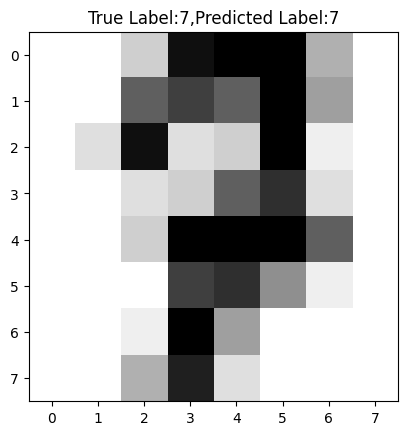

In [33]:
import matplotlib.pyplot as plt
import numpy as np

#随机展示一个样例
index = np.random.randint(0, len(x_test))
sample = x_test[index]
print(sample)
sample = sample.reshape(8, 8)
plt.imshow(sample, cmap=plt.cm.gray_r, interpolation='nearest')
plt.title(f"True Label:{y_test[index]},Predicted Label:{y_pred[index]}")
plt.show()